Model Accuracy for Tumor_Type: 0.49

Classification Report for Tumor_Type:
               precision    recall  f1-score   support

      Benign       0.49      0.50      0.49      1997
   Malignant       0.49      0.47      0.48      2003

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



<ipython-input-1-8eade2ce9f21>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette="Blues")


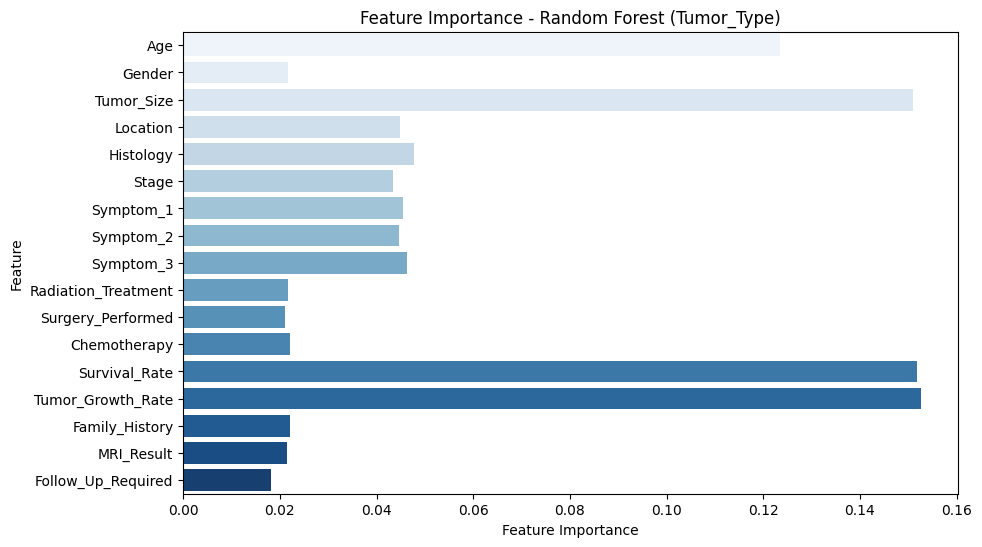

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "brain_tumor_dataset.csv"  # Ensure this file is in the same directory as the notebook
df = pd.read_csv(file_path)

# Drop non-relevant columns
if "Patient_ID" in df.columns:
    df = df.drop(columns=["Patient_ID"])

# Encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "Tumor_Type", "Location", "Histology", "Stage",
                    "Symptom_1", "Symptom_2", "Symptom_3", "Radiation_Treatment",
                    "Surgery_Performed", "Chemotherapy", "Family_History", "MRI_Result",
                    "Follow_Up_Required"]

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()

# Function to train and evaluate a Random Forest model
def train_and_plot_forest(target_column, target_labels):
    if target_column not in df.columns:
        print(f"Column {target_column} not found in dataset.")
        return

    # Prepare features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Standardize numerical features
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=target_labels)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"Model Accuracy for {target_column}: {accuracy:.2f}\n")
    print(f"Classification Report for {target_column}:\n", classification_rep)

    # Plot feature importance
    feature_importances = model.feature_importances_
    feature_names = df.drop(columns=[target_column]).columns

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_names, palette="Blues")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title(f"Feature Importance - Random Forest ({target_column})")
    plt.show()

# Run classification model for Tumor Type (Benign vs. Malignant)
train_and_plot_forest("Tumor_Type", ["Benign", "Malignant"])
